In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

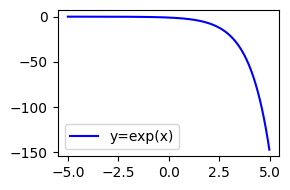

In [9]:
xs = [i*0.01-5 for i in range(1000)]
# func_y = lambda x: np.log(-1*x+1)
func_y = lambda x: -np.exp(x)  # log(1 + exp(x)) is numerically stable
# func_y = lambda x: x
ys = [func_y(x) for x in xs]
plt.figure(figsize=(3, 2))
plt.plot(xs, ys, label='y=exp(x)', color='blue')
plt.legend()
plt.tight_layout()

/local/scr/hmeng/TMPDIR/ipykernel_1492167/4150482790.py:2: RuntimeWarning: divide by zero encountered in log
  func_y = lambda x: -np.log(x)


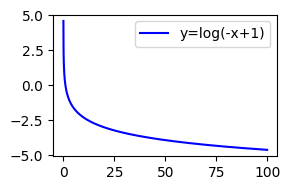

In [71]:
xs = [i*0.01 for i in range(10000)]
func_y = lambda x: -np.log(x)
# func_y = lambda x: np.exp(-1000*x*x)  # log(1 + exp(x)) is numerically stable
# func_y = lambda x: x
ys = [func_y(x) for x in xs]
plt.figure(figsize=(3, 2))
plt.plot(xs, ys, label='y=log(-x+1)', color='blue')
plt.legend()
plt.tight_layout()

In [ ]:
xs = [i*0.001-3.0 for i in range(6000)]
func_y = lambda x,a,b,c,d: a*x*x*x + b*x*x + c*x + d

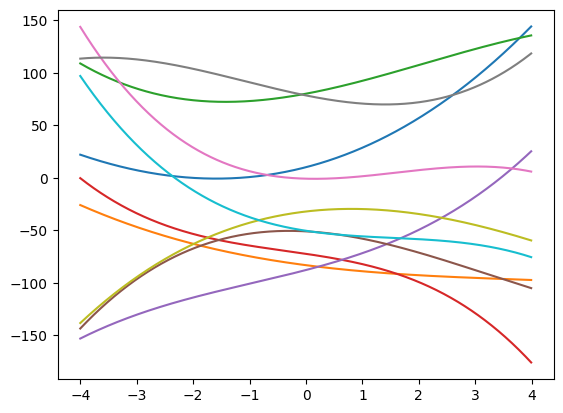

In [23]:
for i in range(10):
    xs = [i*0.01-4.0 for i in range(800)]
    a = round(random.uniform(-1, 1), 2)
    b = round(random.uniform(-5, 5), 2)
    c = round(random.uniform(-20, 20), 2)
    d = round(random.uniform(-100, 100), 2)
    ys = [func_y(x, a, b, c, d) for x in xs]
    plt.plot(xs, ys, label=f'a={a}, b={b}, c={c}, d={d}')
    # idx = int(round(random.uniform(0, 600), 0))
    # plt.plot(xs[idx:idx+200], ys[idx:idx+200], label=f'a={a}, b={b}, c={c}, d={d}')
    # plt.legend()
# for a in [3]:#,6,7,8,9,10]:
#     for b in [1,2,3,4,5,6,7,8,9,10]:
#         for c in [1]:
#         # for c in [1,2,3,4,5,6,7,8,9,10]:
#             for d in [1]:
#             # for d in [1,2,3,4,5,6,7,8,9,10]:
#                 ys = [func_y(x, a, b, c, d) for x in xs]
#                 plt.plot(xs, ys, label=f'a={a}, b={b}, c={c}, d={d}')
#                 plt.legend()
                


In [ ]:
from scipy.optimize import linprog

res = linprog(c=np.zeros(10), A_eq=A, b_eq=c-b, A_ub=D, b_ub=f-e)
if res.success:
    print("约束系统可行")
else:
    print("约束系统不可行")


In [ ]:
import numpy as np
from scipy.optimize import minimize

# 定义三次目标函数
def objective(x, m, n, l, h):
    return np.sum(m * x**3 + n * x**2 + l * x) + h

# 定义约束 Ax + b = c  -> Ax = c - b
def eq_constraint(x, A, b, c):
    return A @ x - (c - b)

# 定义约束 Dx + e < f  -> Dx < f - e -> Dx - f + e <= 0
def ineq_constraint(x, D, e, f):
    return f - (D @ x + e)  # 注意方向：SciPy 认为 ≥0 是满足条件

# 示例参数
dim = 10
m = np.random.randn(dim)
n = np.random.randn(dim)
l = np.random.randn(dim)
h = 0.0

A = np.random.randn(2, dim)
b = np.random.randn(2)
c = np.random.randn(2)

D = np.random.randn(3, dim)
e = np.random.randn(3)
f = np.random.randn(3)

# 构造约束字典
constraints = [
    {'type': 'eq', 'fun': lambda x: eq_constraint(x, A, b, c)},
    {'type': 'ineq', 'fun': lambda x: ineq_constraint(x, D, e, f)}
]

# 可选：添加变量边界
bounds = [(-10, 10)] * dim  # 每个 x_i ∈ [-10, 10]

# 初始解
x0 = np.zeros(dim)

# 调用求解器
res = minimize(objective, x0, args=(m, n, l, h),
               method='SLSQP', bounds=bounds,
               constraints=constraints)

# 结果
if res.success:
    print("✅ 优化成功！")
    print("最优解 x* =", res.x)
    print("最优值 f(x*) =", res.fun)
else:
    print("❌ 优化失败：", res.message)


🚀 Starting data analysis...
✅ Successfully loaded data: results/last_epoch_data.pkl
�� 数据信息
轮次: 302
样本数: 8,334
Y维度: 100
轨迹步数: 5
动作维度: 100
📊 统计摘要

🎯 Y Data (Norms):
Y_init: mean=5.0509, std=1.1015, range=[3.2658, 12.6244]
Y_target: mean=8.8051, std=0.0667, range=[8.5564, 9.0446]
Distance: mean=7.0271, std=0.5834, range=[5.6704, 11.9645]

📈 Y Data (Raw Values):
Y_init: mean=-0.1527, std=0.4939, range=[-3.4292, 3.0380]
Y_target: mean=-0.4558, std=0.7534, range=[-2.7625, 1.8600]
Distance: mean=0.3031, std=0.6367, range=[-2.4723, 3.0560]

🎮 Trajectory Actions:
Step 0: action_norm(mean=2.4954, std=0.2277), action_abs(mean=0.1962, std=0.1558)
Step 1: action_norm(mean=1.9122, std=0.1678), action_abs(mean=0.1517, std=0.1177)
Step 2: action_norm(mean=1.4063, std=0.1257), action_abs(mean=0.1104, std=0.0880)
Step 3: action_norm(mean=0.9491, std=0.0943), action_abs(mean=0.0717, std=0.0630)
Step 4: action_norm(mean=0.5250, std=0.0678), action_abs(mean=0.0349, std=0.0398)

Generating charts...


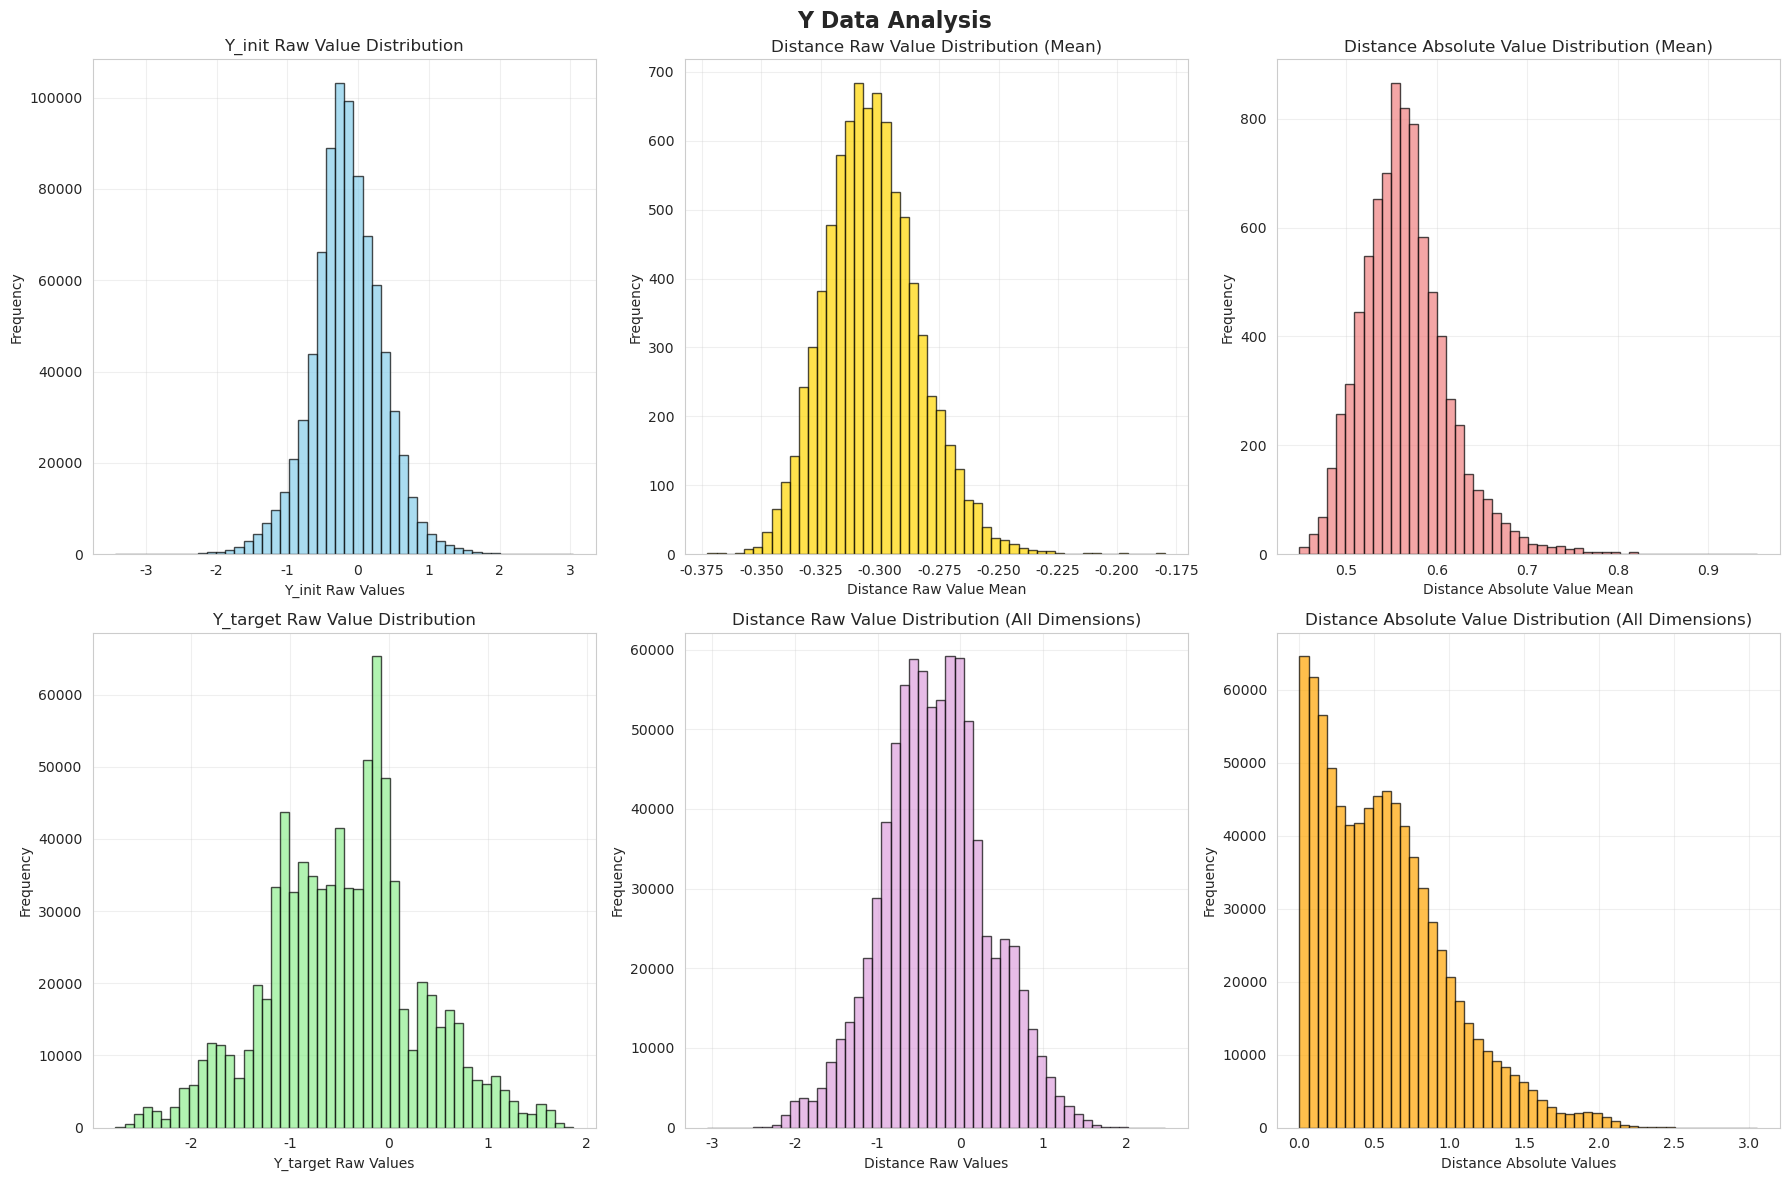

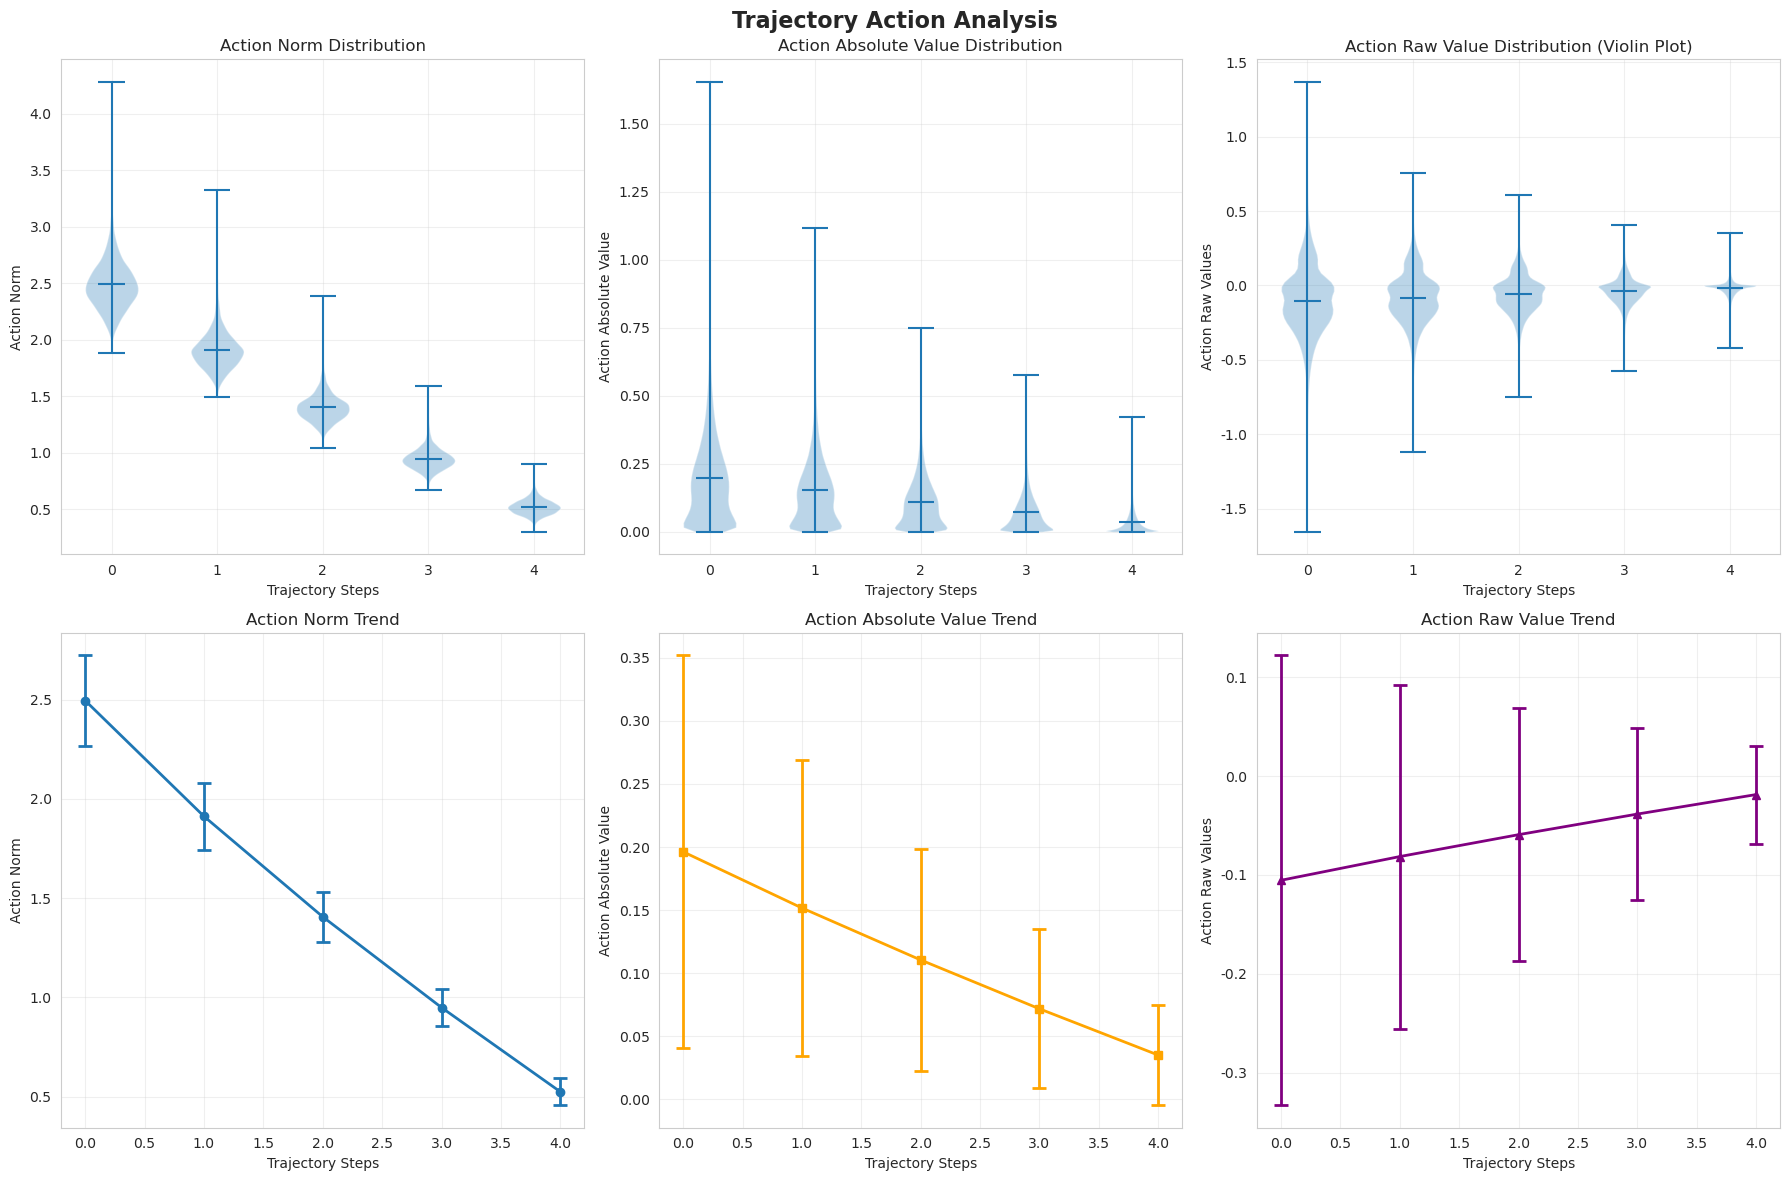


✅ Analysis completed!


In [1]:
from pg import run_analysis
file_path = "results/last_epoch_data.pkl"
run_analysis(file_path)

In [3]:
a = 0.9
b = 0.035
list_num=[a-n*b for n in range(5)]
print(list)
ans = 1
for x in list_num:
    ans *= x
print(ans)

[0.9, 0.865, 0.8300000000000001, 0.795, 0.76]
0.39040685100000005


📈 Y Data (Raw Values):
Y_init: mean=-0.1527, std=0.4939, range=[-3.4292, 3.0380]
Y_target: mean=-0.4558, std=0.7534, range=[-2.7625, 1.8600]
Distance: mean=0.3031, std=0.6367, range=[-2.4723, 3.0560]